<a href="https://colab.research.google.com/github/0oAstro/summer-of-code-2024/blob/main/machine-learning/week-1/Financial_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fraud Detection Model by 0oAstro
I tried so fucking hard not to use this dataset. [This shit of anonymised](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud) data but seeing y'all didn't mind so here it is, in all its glory ;\).

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from xgboost import XGBClassifier
import lightgbm as lgb
import tensorflow as tf
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline

In [33]:
# Bootstrap the database
!rm -rf cc.zip creditcard.csv
!curl -L -o ./cc.zip\
  https://www.kaggle.com/api/v1/datasets/download/mlg-ulb/creditcardfraud
!unzip ./cc.zip
!rm -rf cc.zip
!mv creditcard.csv cc.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 65.9M  100 65.9M    0     0  34.1M      0  0:00:01  0:00:01 --:--:-- 65.5M
Archive:  ./cc.zip
  inflating: creditcard.csv          


In [34]:
df = pd.read_csv("./cc.csv")
print("Dataset loaded successfully!")

Dataset loaded successfully!


array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

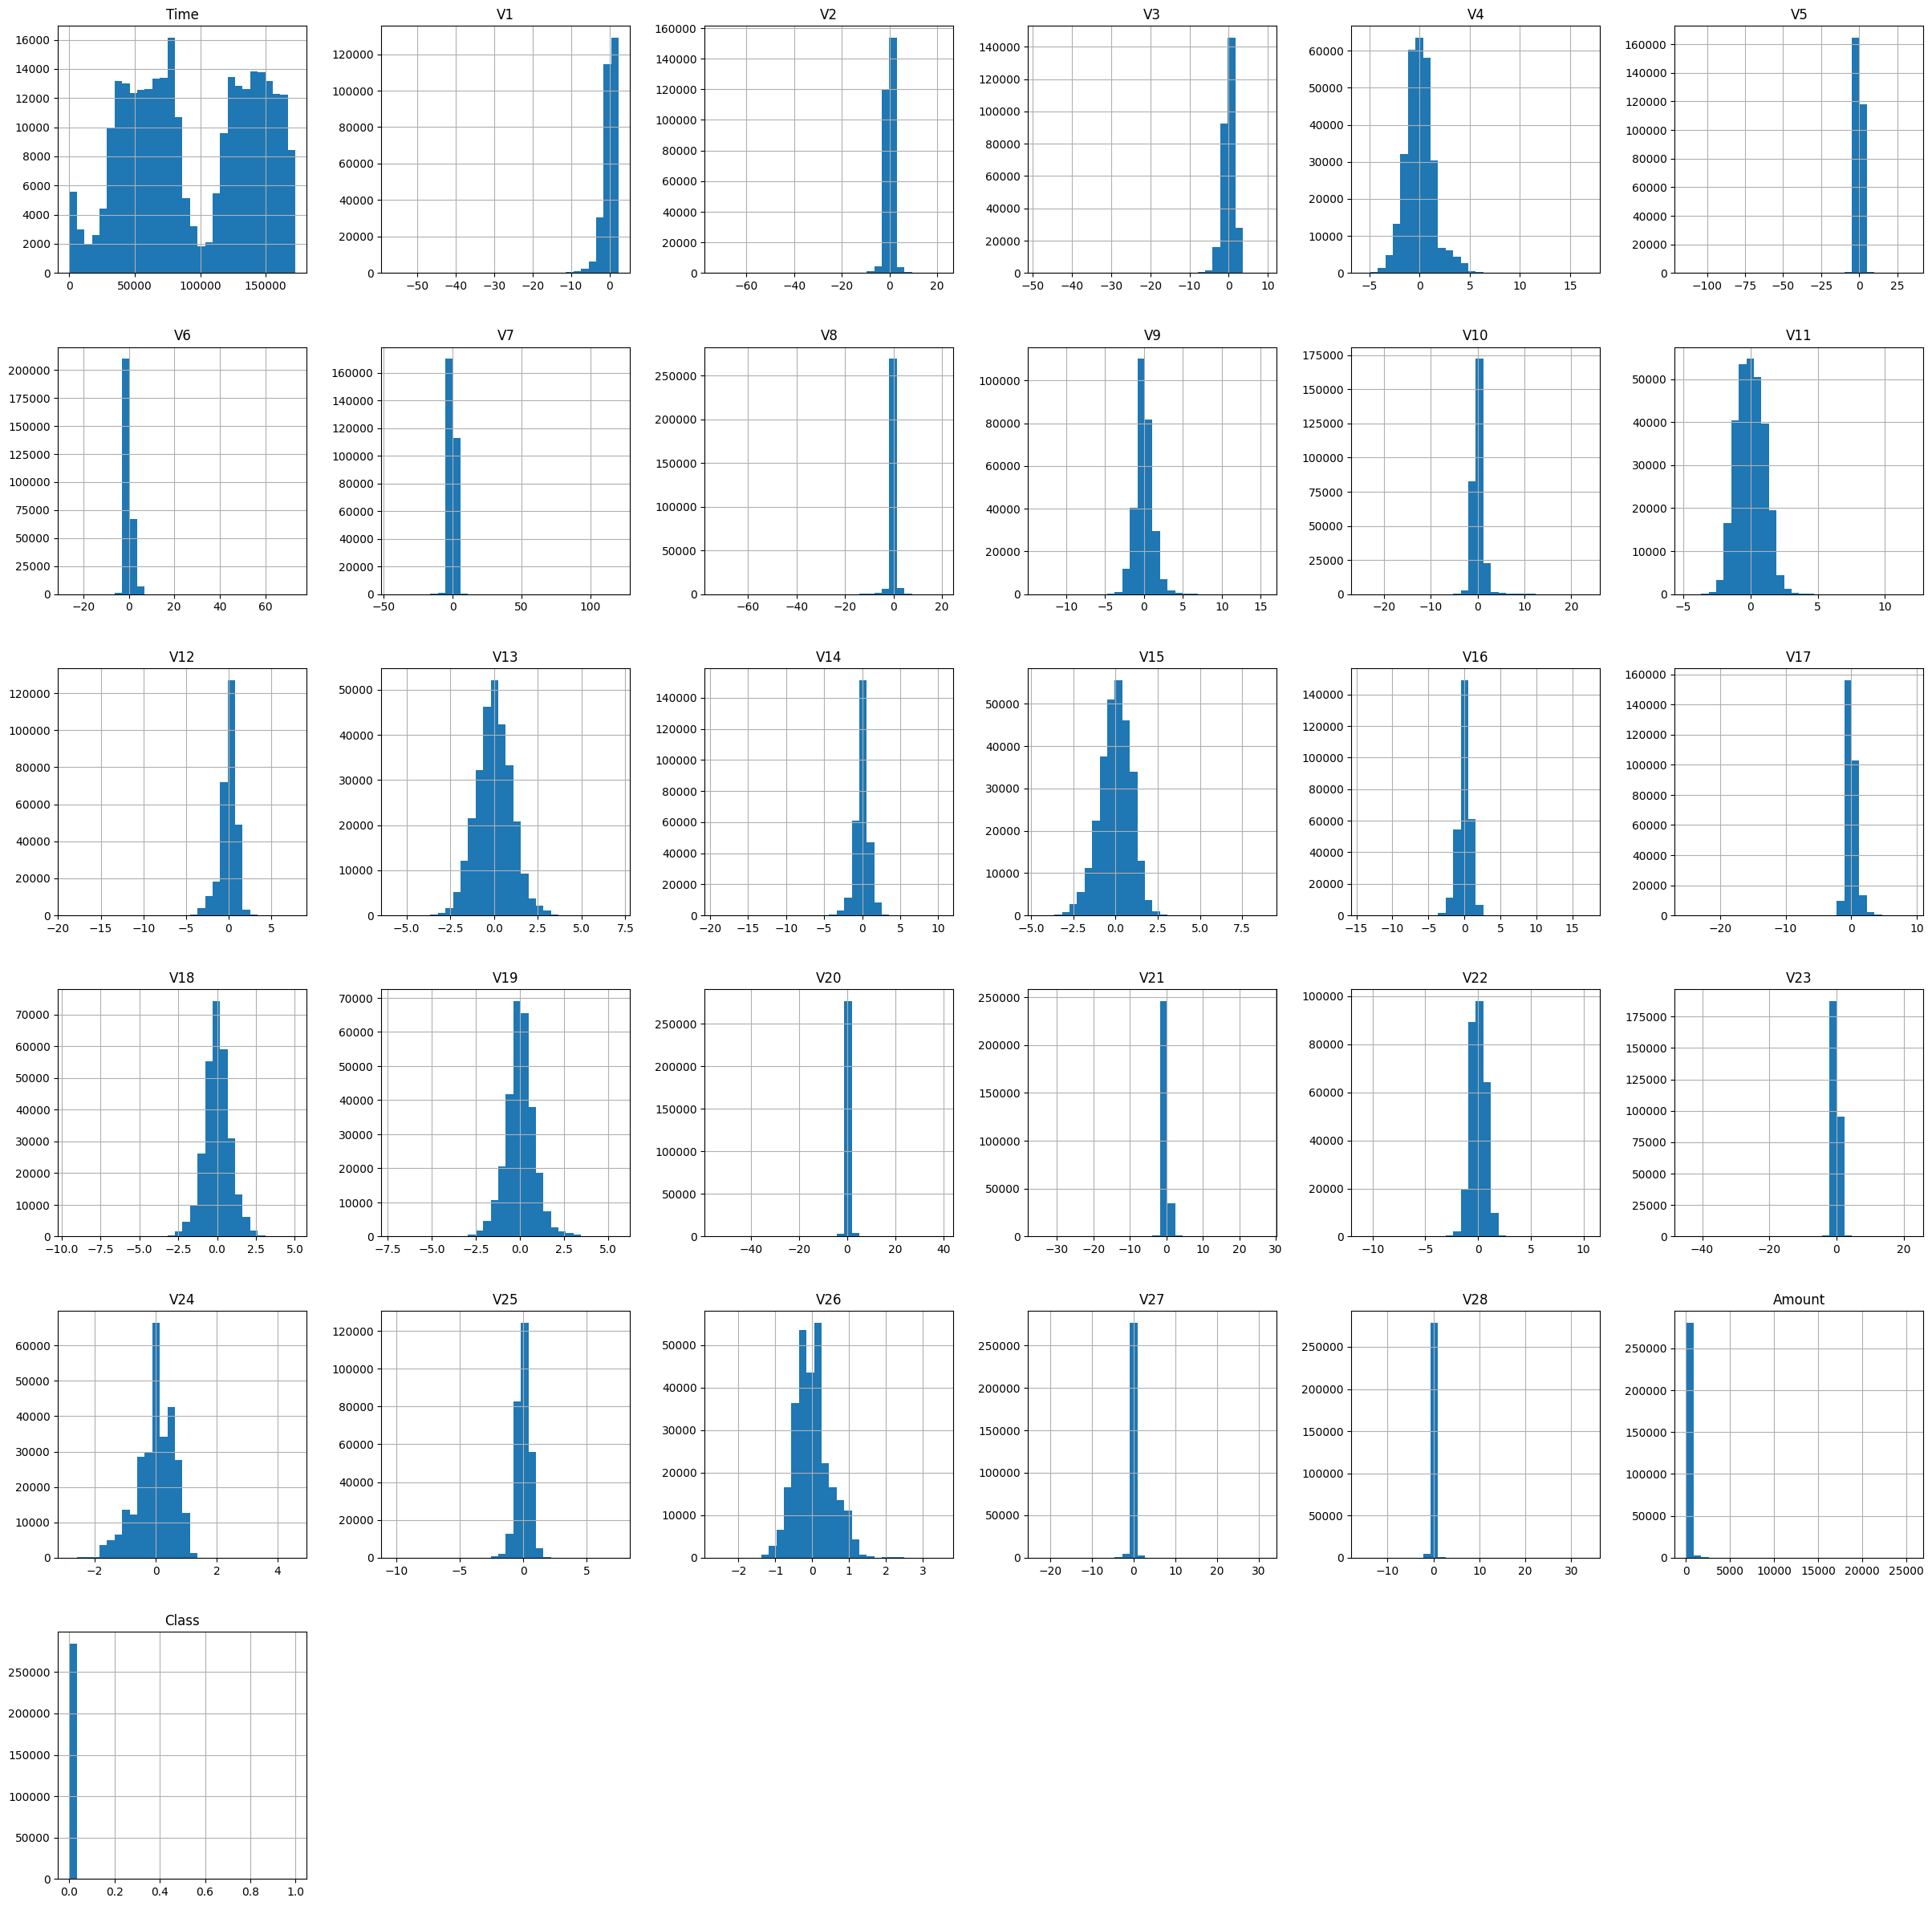

In [35]:
df.hist(bins=30, figsize=(30, 30))

Initial Reaction: We are fucked

Final Reaction: We are fucked

In [36]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [38]:
df.fillna(df.mean(), inplace=True)  # Replace missing values with the mean of each

In [39]:
df = df.drop_duplicates() # Weeding out the duplicates that shall not breathe in the holy ground of Astro's code

In [40]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


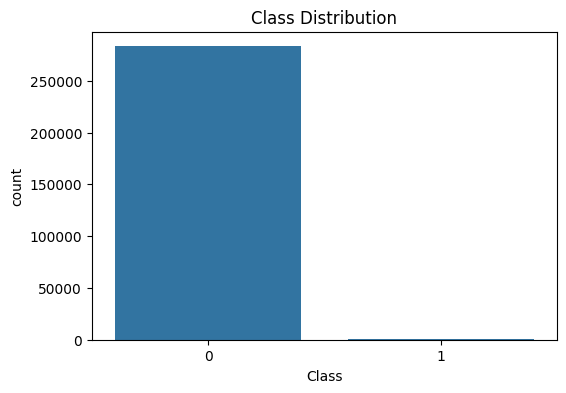

In [41]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

The above graph indicates that it's a heavly skewed dataset with very little fraud transactions which may impact the whole model's performance.

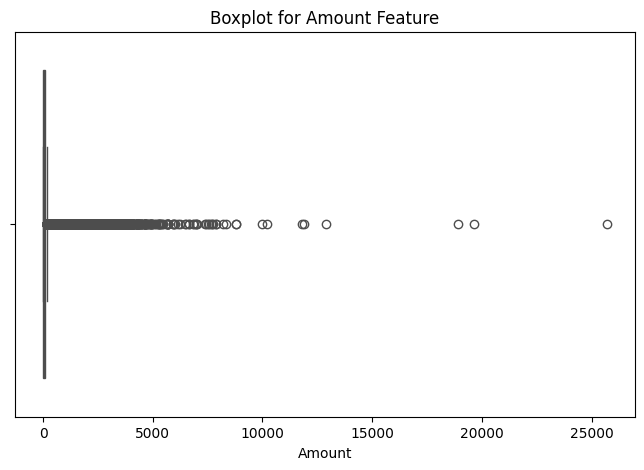

In [42]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Amount'], color='orange')
plt.title('Boxplot for Amount Feature')
plt.show()

The database is skewed as hell for the amounts too. Need to fix this.

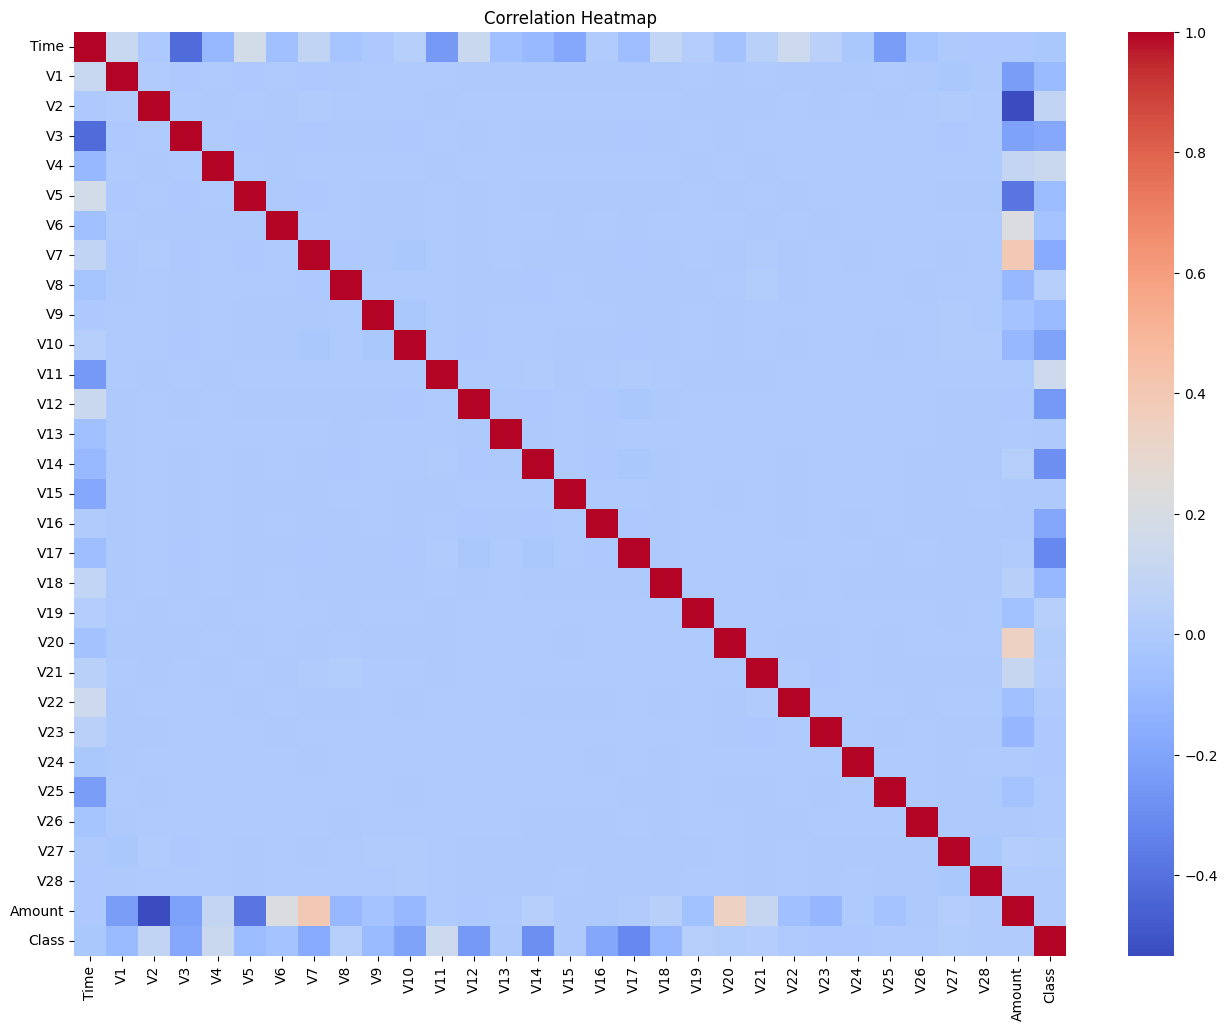

In [43]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

As expected V[1:29] are independant of each other, and Amount and Class depend on them straight up. Some strong correlations can be seen pretty easily but well let's not get ahead of ourselves master.

## Remove outliers and scale stuff
Seeing the above graphs, only thing I know is that it's time to fix this crappy data so it doesn't just fuck our entire model.

In [44]:
from sklearn.preprocessing import RobustScaler
new_df = df.copy()
new_df['Amount'] = RobustScaler().fit_transform(new_df['Amount'].to_numpy().reshape(-1, 1))
time = new_df['Time']
new_df['Time'] = (time - time.min()) / (time.max() - time.min())
new_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,0.548701,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,0.924387,0.001667
std,0.274787,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,3.482123,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,-0.305938,0.000000
25%,0.313699,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,-0.228063,0.000000
50%,0.490141,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,0.000000,0.000000
75%,0.806160,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,0.771937,0.000000
max,1.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,356.962314,1.000000


array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

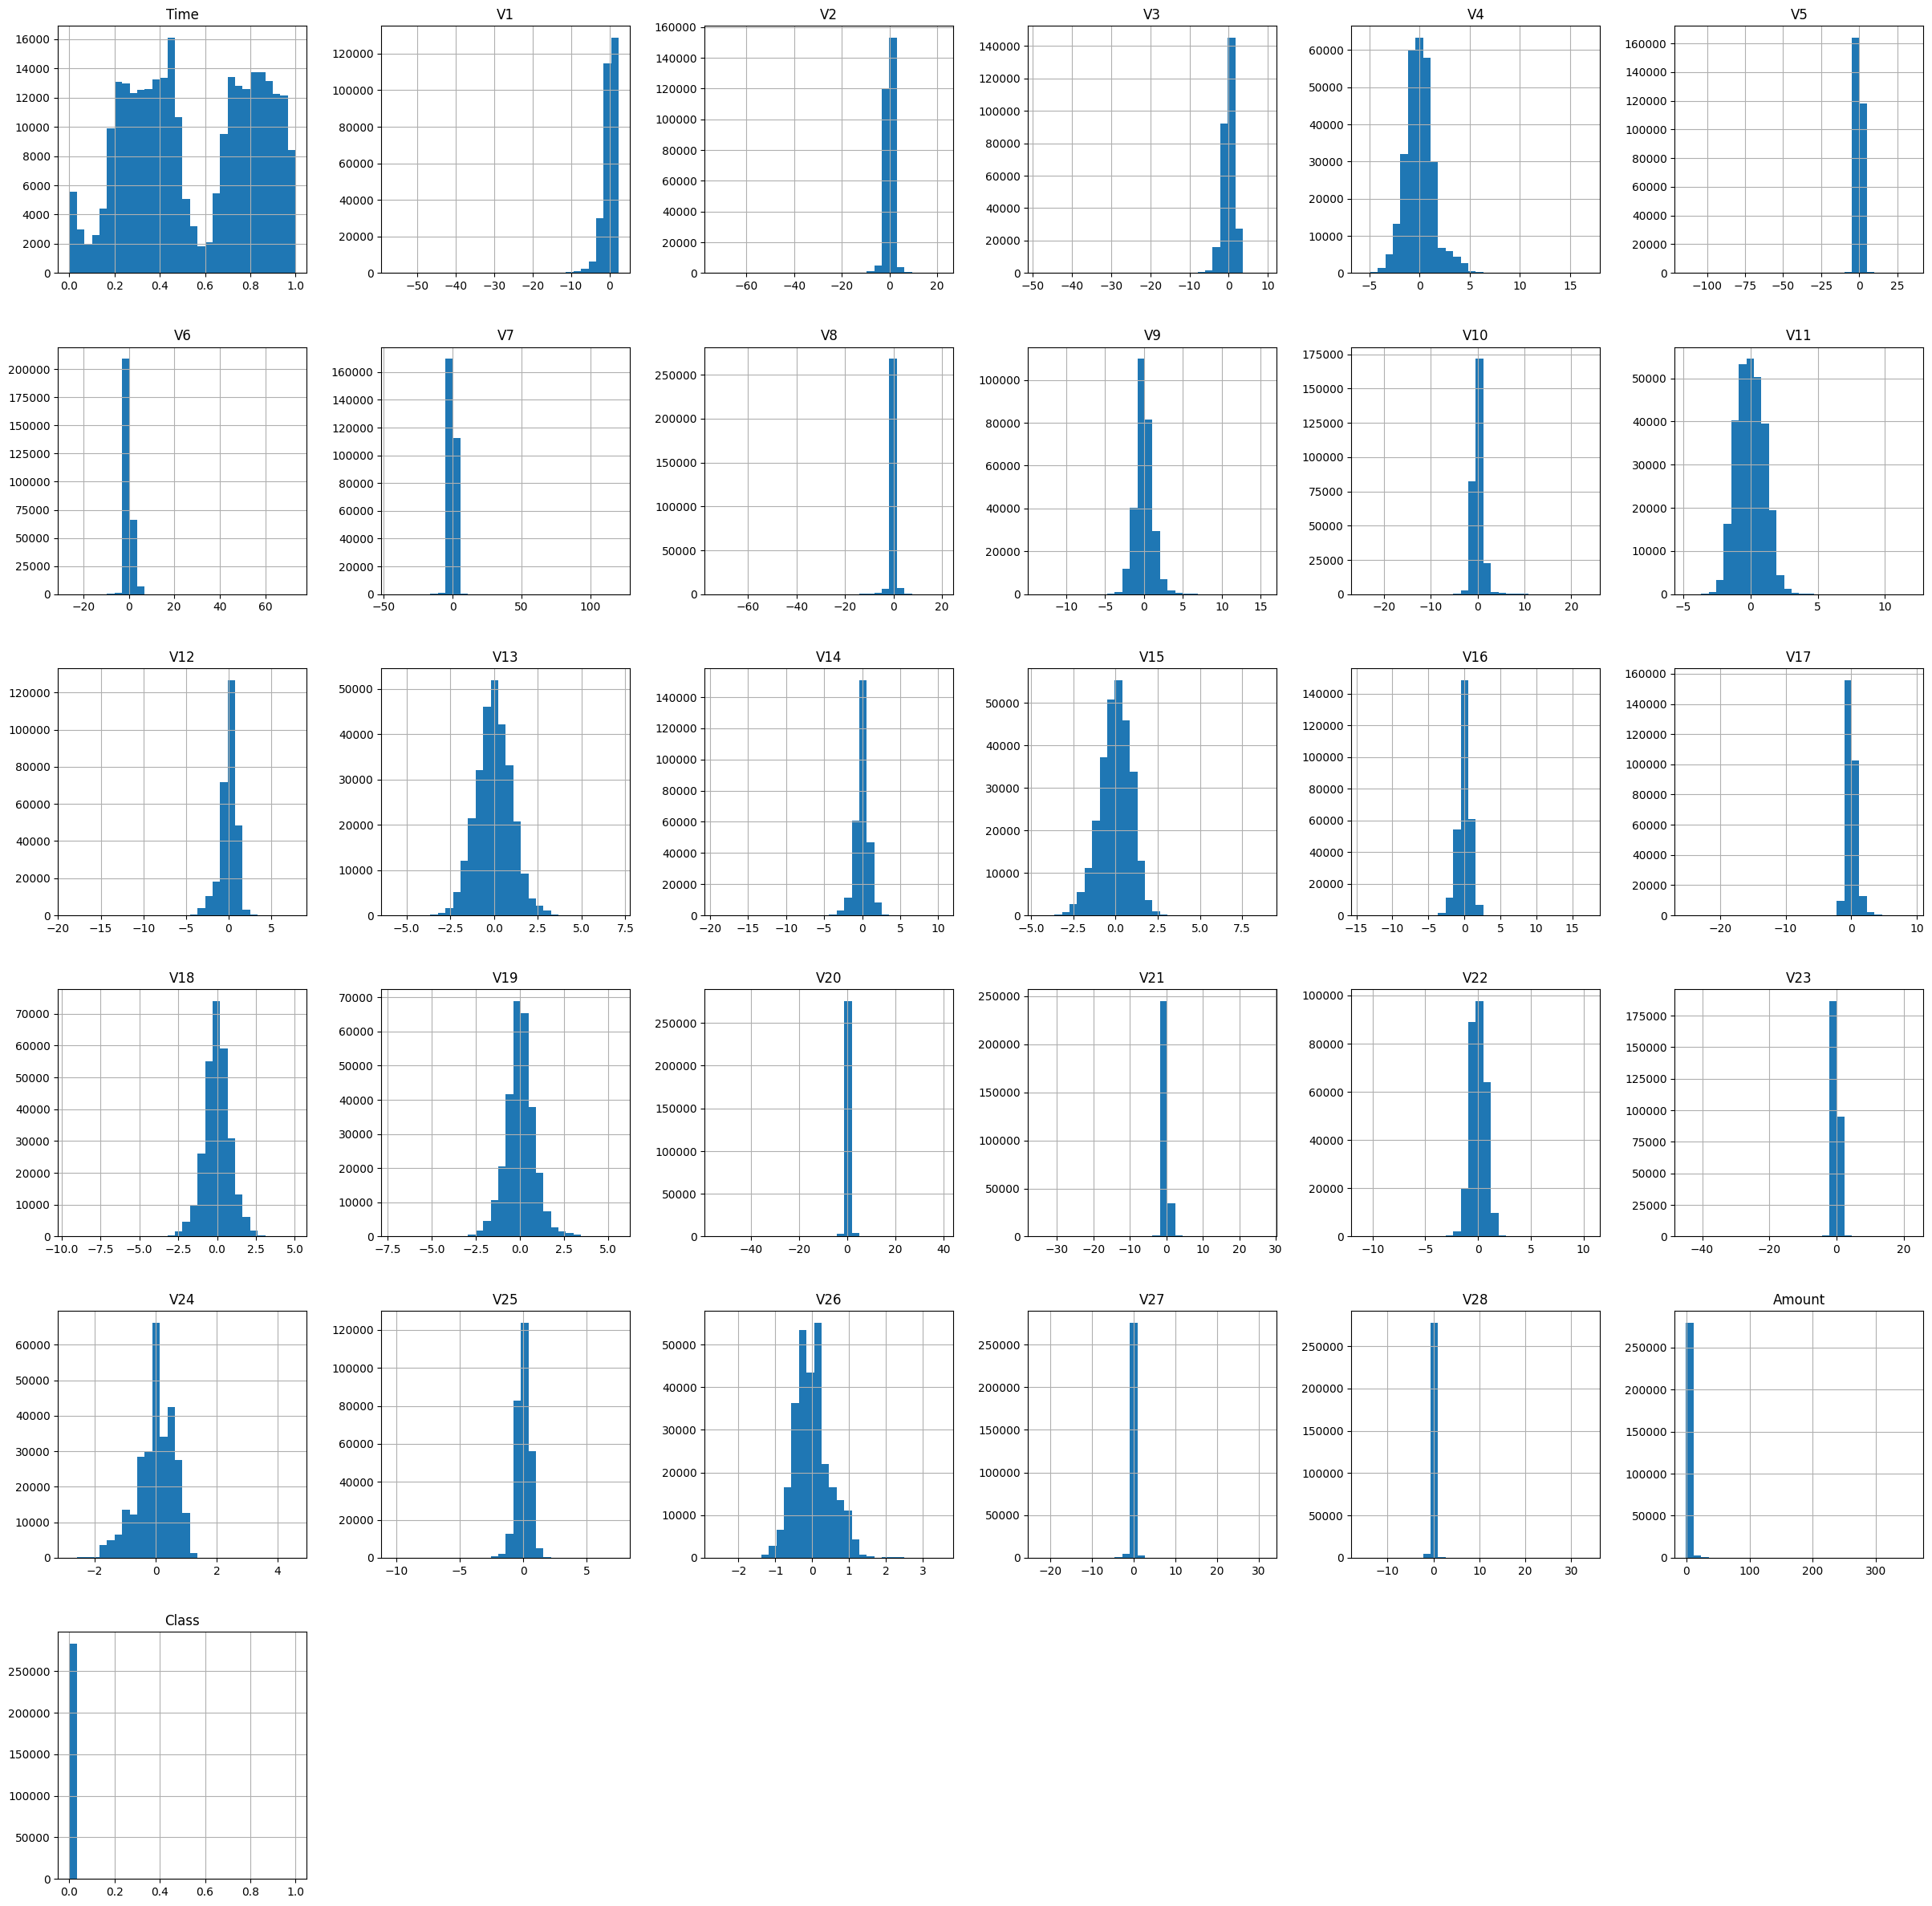

In [45]:
new_df.hist(bins=30, figsize=(30, 30))

In [46]:
def remove_outliers_iqr(df, feature_columns, target_column='Class'):
    # Separate rows where Class = 1
    fraud_rows = df[df[target_column] == 1]

    # Non-fraudulent rows
    non_fraud_rows = df[df[target_column] == 0]

    # Apply IQR filtering only to non-fraudulent rows
    for col in feature_columns:
        Q1 = non_fraud_rows[col].quantile(0.25)
        Q3 = non_fraud_rows[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        non_fraud_rows = non_fraud_rows[(non_fraud_rows[col] >= lower_bound) & (non_fraud_rows[col] <= upper_bound)]

    # Combine the cleaned non-fraud rows with the original fraud rows
    cleaned_df = pd.concat([non_fraud_rows, fraud_rows], axis=0)

    return cleaned_df

# Apply the function
feature_columns = [col for col in new_df.columns if col not in ['Class']]  # Exclude the 'Class' column
new_df = remove_outliers_iqr(new_df, feature_columns)

Same code as above again, could've defined a function but nah.

In [47]:
new_df = new_df.sample(frac=1, random_state=10) # just randomise it for train test split
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
241786,0.874959,1.959684,-0.368912,-0.226452,0.500071,-0.697865,-0.396879,-0.613104,-0.020772,1.355553,...,0.217918,0.870087,0.193927,1.184316,-0.109722,-0.273648,0.040547,-0.024425,-0.167014,0
86152,0.353645,1.334201,-1.465592,0.487974,-1.613730,-1.383040,0.496005,-1.451407,0.255811,-1.654566,...,-0.183000,-0.328163,-0.009137,-0.867565,0.112019,-0.236956,0.049973,0.019839,0.780976,0
197656,0.764601,2.092091,-1.045384,-2.114374,-0.962723,-0.099705,-0.708805,-0.096063,-0.227661,-0.552535,...,0.254235,0.578652,-0.155280,-0.781306,0.331243,0.031343,-0.084826,-0.084586,0.943541,0
147049,0.509682,0.127699,0.984483,-0.525287,-0.741196,1.159804,-0.316518,0.862076,0.053542,-0.298162,...,-0.312607,-0.778798,0.034824,0.179838,-0.400891,0.116321,0.219223,0.070818,-0.287999,0
239163,0.868021,0.059365,0.830685,-0.631197,-0.729273,1.045585,-0.208244,0.981993,0.068030,-0.248527,...,-0.296888,-0.830738,0.132400,0.077449,-0.384903,0.121608,0.201154,0.072325,0.319705,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245724,0.884769,-1.305496,0.291079,0.874716,-0.251690,0.062003,-0.095813,-0.317060,0.633115,0.644954,...,0.235474,0.916143,0.308844,0.605744,-0.075413,-0.164675,0.254114,0.116564,-0.167014,0
125708,0.450061,-0.823858,0.714181,1.734141,1.467581,0.615788,0.351615,0.717450,0.305330,-1.191158,...,0.017343,-0.141279,0.148023,-0.030387,-0.434889,-0.361146,0.100578,0.148702,0.524266,0
248714,0.891604,1.957564,-0.480766,0.049169,0.456831,-0.988025,-0.427195,-0.830261,0.037034,1.596412,...,0.070837,0.380377,0.246489,-0.124873,-0.375677,-0.402773,0.055962,-0.026350,-0.112780,0
274384,0.960583,-0.581903,0.579558,1.544482,-0.519722,-0.042626,0.073754,0.390145,0.164750,0.173614,...,-0.088133,-0.258972,-0.044005,-0.392699,-0.330809,-0.537164,0.036332,0.116369,0.110277,0


In [48]:
print(f"Shape of old Database: {df.shape}")
print(f"Shape of new Database: {new_df.shape}")

Shape of old Database: (283726, 31)
Shape of new Database: (110279, 31)


We halved this by weeding out stuff.


In [69]:
new_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,110279.000000,110279.000000,110279.000000,110279.000000,110279.000000,110279.000000,110279.000000,110279.000000,110279.000000,110279.000000,...,110279.000000,110279.000000,110279.000000,110279.000000,110279.000000,110279.000000,110279.000000,110279.000000,110279.000000,110279.000000
mean,0.551818,0.830449,0.097900,0.051861,0.131777,-0.137017,-0.423208,-0.003080,0.012722,0.011454,...,-0.042769,-0.065099,0.014963,0.014797,0.059569,-0.014232,0.012912,0.003991,0.101856,0.004289
std,0.270250,1.239672,0.755827,1.326050,1.044342,0.813303,0.612549,0.845104,0.462116,0.830449,...,0.296383,0.661549,0.208381,0.502194,0.405772,0.408746,0.124199,0.070497,0.529748,0.065351
min,0.000000,-30.552380,-8.402154,-31.103685,-3.177380,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,-0.305938,0.000000
25%,0.319482,-0.287319,-0.354086,-0.744724,-0.612122,-0.592016,-0.839323,-0.436882,-0.184403,-0.460985,...,-0.236183,-0.619096,-0.106367,-0.315858,-0.265608,-0.309319,-0.046272,-0.043002,-0.264914,0.000000
50%,0.468372,1.180793,0.058703,0.226951,0.219809,-0.123778,-0.483681,0.058894,-0.018946,0.000491,...,-0.056690,-0.080964,0.006457,0.040175,0.087805,-0.001754,-0.001594,0.008654,-0.104714,0.000000
75%,0.812636,1.928977,0.570486,0.937659,0.725038,0.358098,-0.043196,0.453337,0.172430,0.511639,...,0.133501,0.436948,0.133165,0.393719,0.370324,0.202882,0.052362,0.033948,0.309275,0.000000
max,0.999959,2.379970,22.057729,3.790995,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.299212,2.208209,2.745261,3.052358,1.779364,29.256988,1.000000


array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

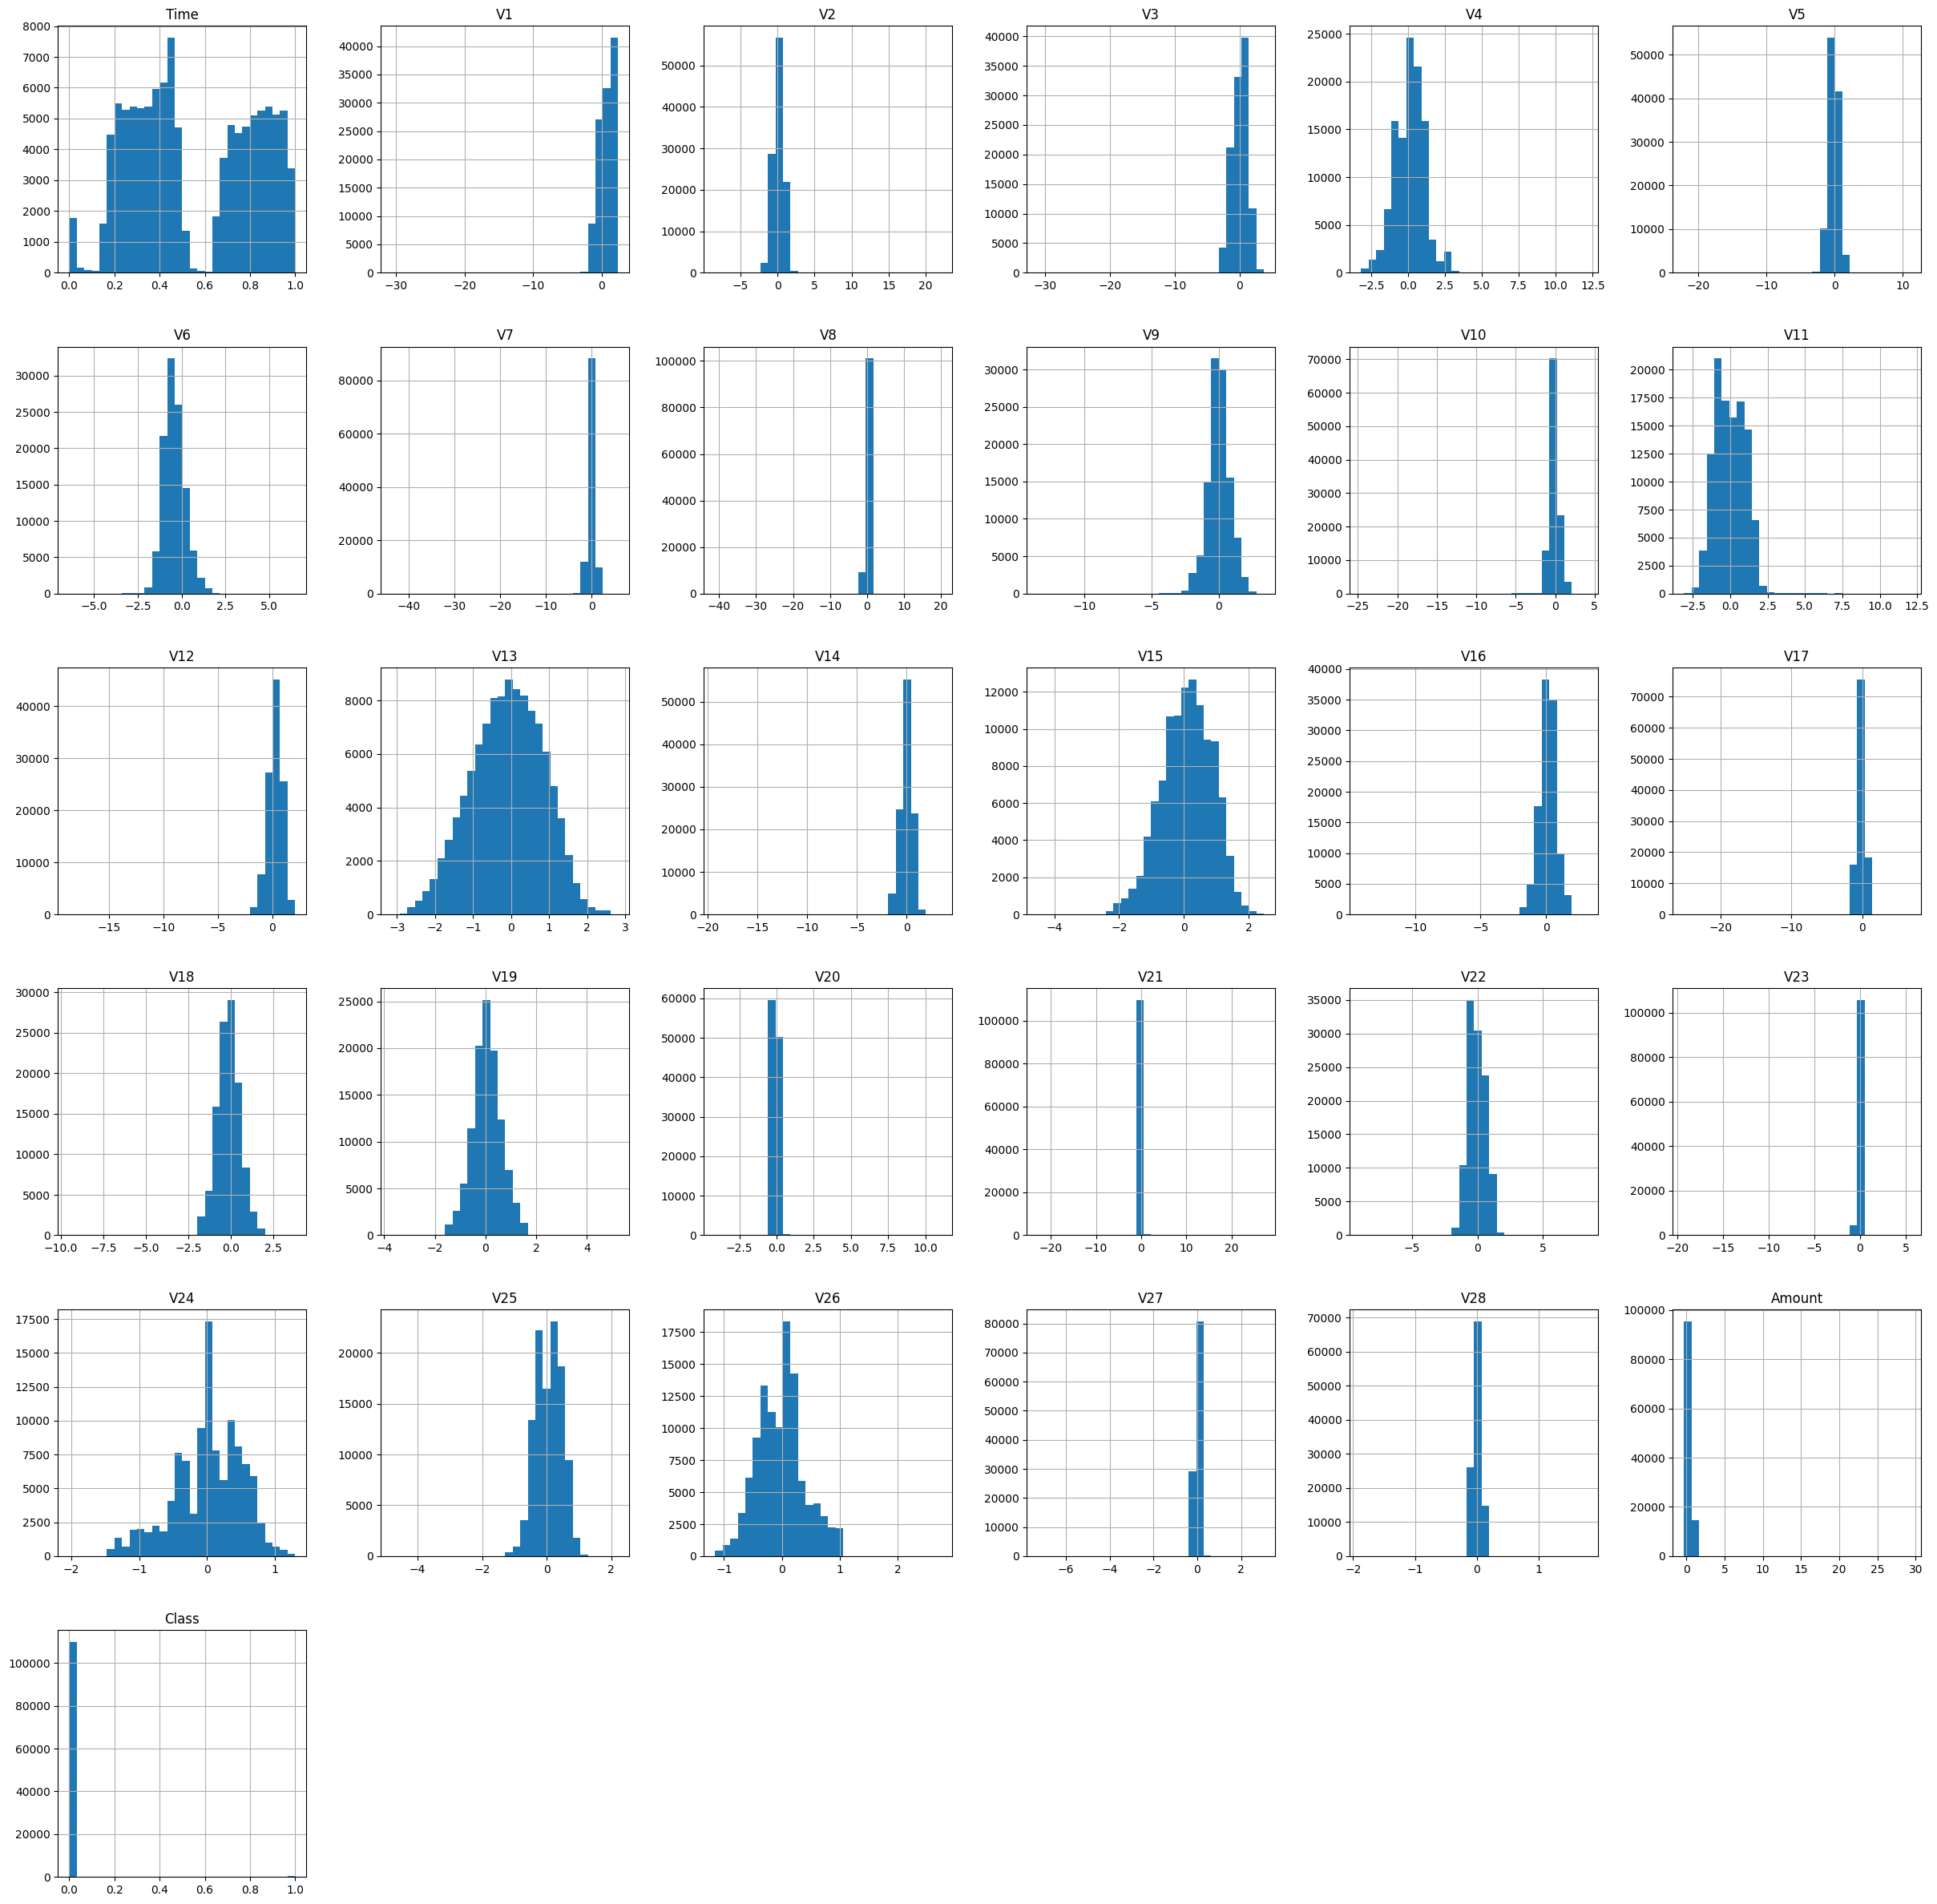

In [49]:
new_df.hist(bins=30, figsize=(30, 30))

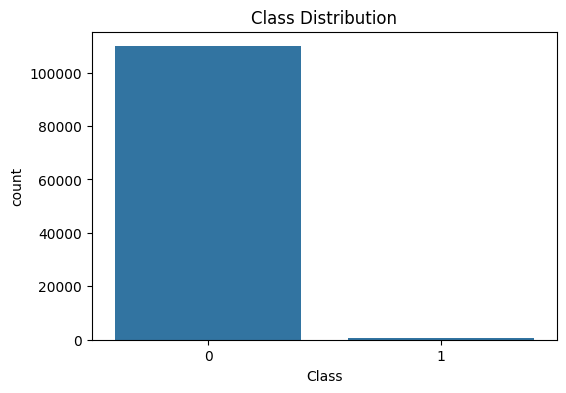

In [50]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=new_df)
plt.title('Class Distribution')
plt.show()

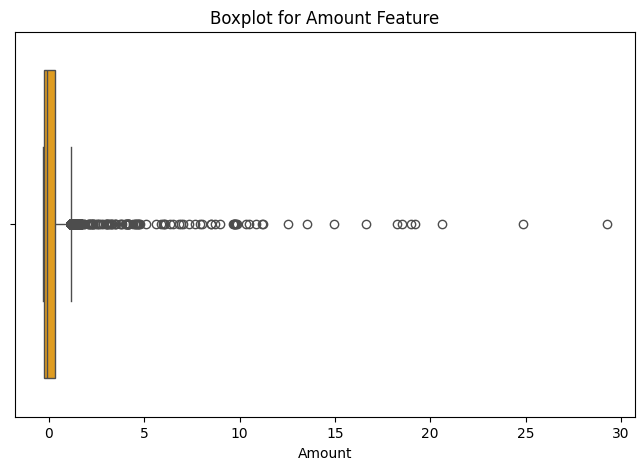

In [51]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=new_df['Amount'], color='orange')
plt.title('Boxplot for Amount Feature')
plt.show()

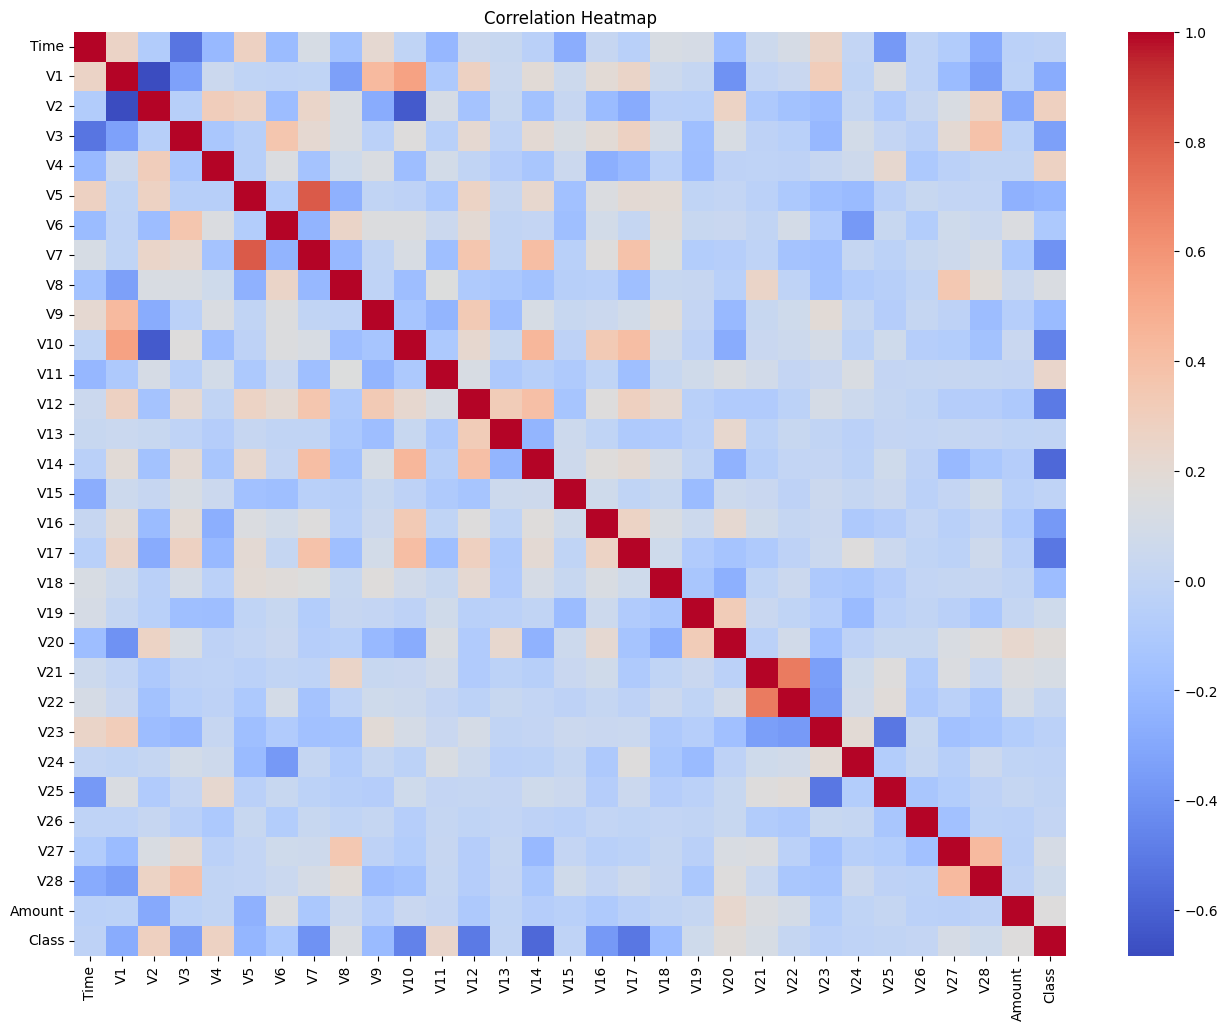

In [52]:
plt.figure(figsize=(16, 12))
sns.heatmap(new_df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

Now we talking baby, this looks good

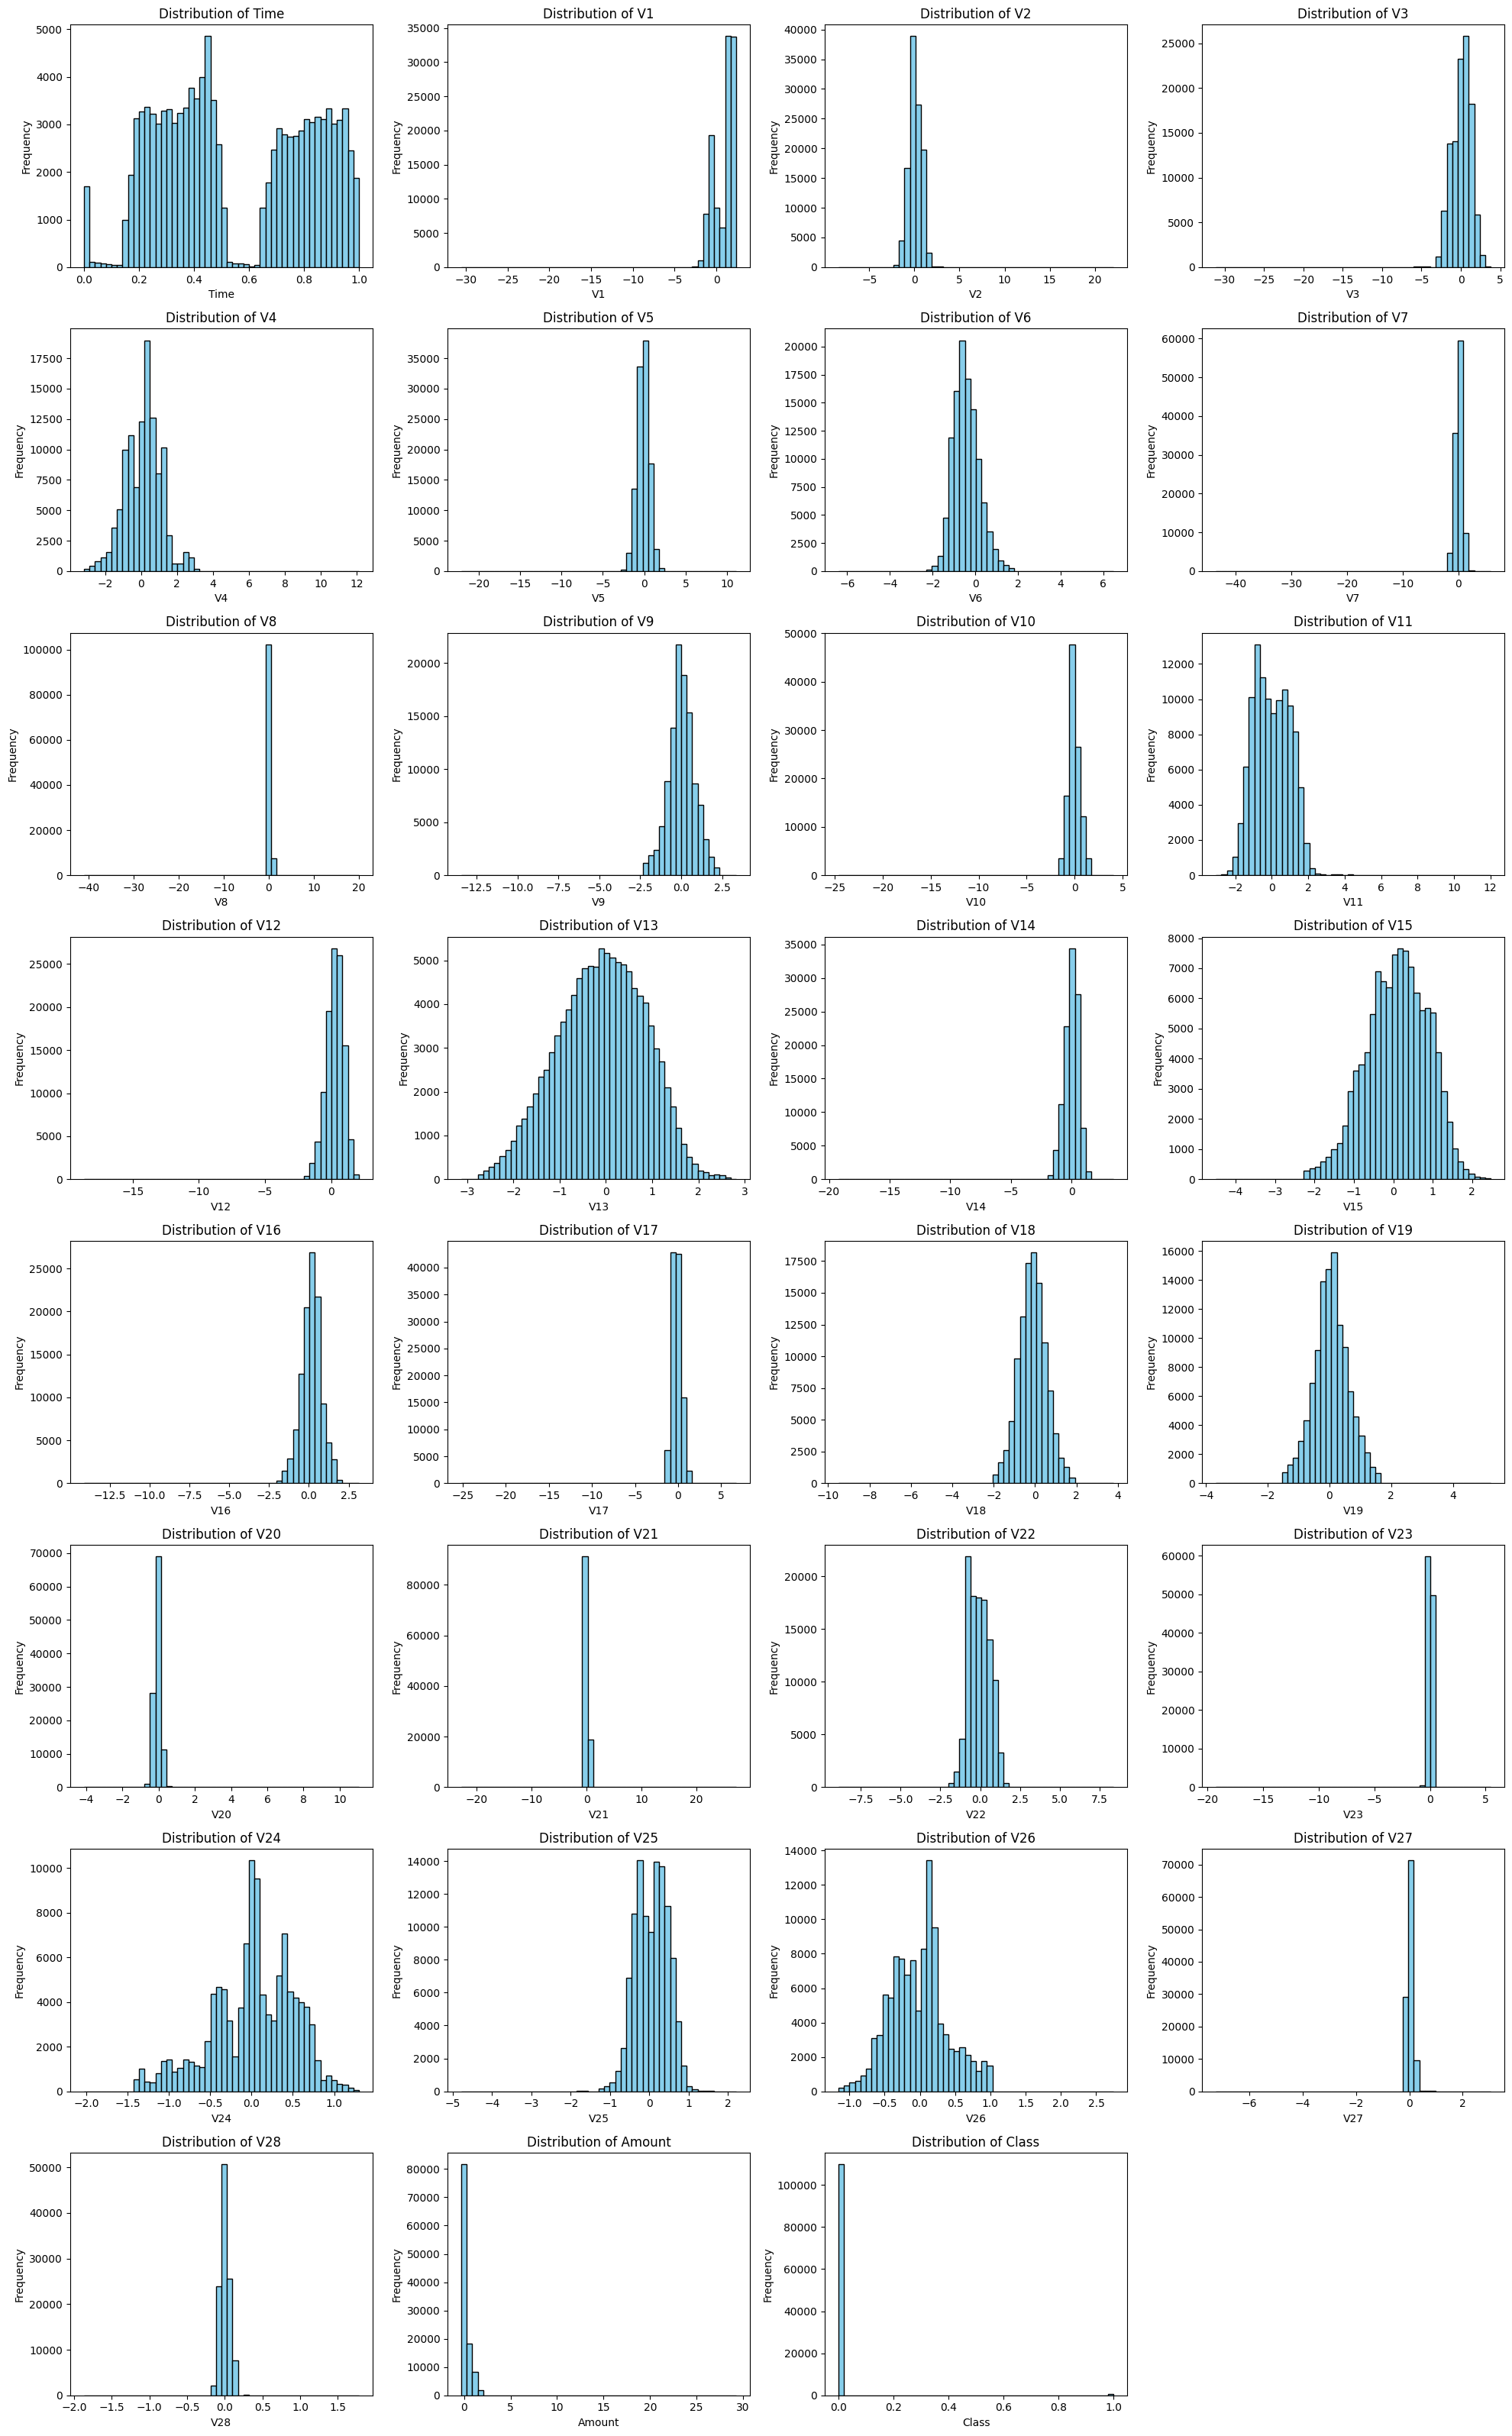

In [53]:
# One Final graph for this data stuff I swear
features = new_df.columns  # All columns
num_features = len(features)

# Determine grid size dynamically for all columns
rows = (num_features // 4) + (1 if num_features % 4 != 0 else 0)  # Create rows dynamically

fig, axes = plt.subplots(rows, 4, figsize=(20, rows * 4))
axes = axes.flatten()

# Plot histograms for all columns
for i, col in enumerate(features):
    axes[i].hist(new_df[col], bins=50, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

# Hide unused axes (for clean output)
for i in range(num_features, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


Doesn't this beauty looks so good 🤤?

Yes I am graph sexual


---



## Juicy stuff of training and testing stuff

In [54]:
# Features and Target
X = new_df.drop(columns=["Class"], axis=1)  # Drop the target column
y = new_df["Class"]  # Target column (Class: 0 = Legitimate, 1 = Fraud)

# Split into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, stratify=y)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=10)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [56]:
# Build the Neural Network using TensorFlow/Keras
def build_nn_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(input_shape,)),  # Define the input shape explicitly here
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Initialize Neural Network Model
nn_model = build_nn_model(X_train_smote.shape[1])

In [57]:
models = {
    "Logistic Regression": LogisticRegression(),

    # this bad boy was atleast pretty reasonable in not going crazy with training time
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=10),


    # dear god, after trying everything in the book i lost my cool (too long runtime)
    # svm might be the most fucked up thing to be used for this stuff
    # please forgive me for this

    # say with me please
    # FUCK YOU SVM FUCK YOU SVM
    # "Support Vector Mechanics": SGDClassifier(loss="hinge", max_iter=1000, tol=1e-3, random_state=10),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "LightGBM": lgb.LGBMClassifier(),
}

In [58]:
# Storage for results
results = {"Model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1-Score": [], "ROC-AUC": []}

In [59]:
# Build and evaluate models
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train_smote, y_train_smote)

    # Predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else 0.0

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")
    print(f"ROC-AUC: {roc_auc}")

    # Save results
    results["Model"].append(model_name)
    results["Accuracy"].append(accuracy)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1-Score"].append(f1)
    results["ROC-AUC"].append(roc_auc)

Training Logistic Regression...
Model: Logistic Regression
Accuracy: 0.9868818764357393
Precision: 0.23835125448028674
Recall: 0.9366197183098591
F1-Score: 0.38
ROC-AUC: 0.9815277128132159
Training Random Forest...
Model: Random Forest
Accuracy: 0.9997581912707049
Precision: 0.9855072463768116
Recall: 0.9577464788732394
F1-Score: 0.9714285714285714
ROC-AUC: 0.9921482785364972
Training XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:01:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model: XGBoost
Accuracy: 0.9995163825414097
Precision: 0.95
Recall: 0.9366197183098591
F1-Score: 0.9432624113475178
ROC-AUC: 0.9863977746632794
Training LightGBM...
[LightGBM] [Info] Number of positive: 76864, number of negative: 76864
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.047044 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 153728, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Model: LightGBM
Accuracy: 0.9996070608148954
Precision: 0.9708029197080292
Recall: 0.9366197183098591
F1-Score: 0.953405017921147
ROC-AUC: 0.9946495804405695


In [60]:
# Train and Evaluate Neural Network
print(f"Training Neural Network...")
nn_model.fit(X_train_smote, y_train_smote, epochs=10, batch_size=64)
y_pred_nn = (nn_model.predict(X_test) > 0.5).astype("int32")
y_proba_nn = nn_model.predict(X_test)


Training Neural Network...
Epoch 1/10
2402/2402 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9774 - loss: 0.0603
Epoch 2/10
2402/2402 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9993 - loss: 0.0027
Epoch 3/10
2402/2402 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9996 - loss: 0.0012
Epoch 4/10
2402/2402 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9998 - loss: 7.0471e-04
Epoch 5/10
2402/2402 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9998 - loss: 5.7834e-04
Epoch 6/10
2402/2402 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9998 - loss: 7.2376e-04
Epoch 7/10
2402/2402 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9999 - loss: 5.0765e-04
Epoch 8/10
2402/2402 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9998 - loss: 4.2804e-04
Epoch 9/10
2402/2402 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9997 - loss: 9.6582e-04
Epoch 10/10
2402/2402 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9999 - loss: 3.8345e-04
1034/1034 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1034/1034 ━━━━━━━━━━━

In [61]:
accuracy_nn = accuracy_score(y_test, y_pred_nn)
precision_nn = precision_score(y_test, y_pred_nn)
recall_nn = recall_score(y_test, y_pred_nn)
f1_nn = f1_score(y_test, y_pred_nn)
roc_auc_nn = roc_auc_score(y_test, y_proba_nn)

In [62]:
results["Model"].append("Neural Network")
results["Accuracy"].append(accuracy_nn)
results["Precision"].append(precision_nn)
results["Recall"].append(recall_nn)
results["F1-Score"].append(f1_nn)
results["ROC-AUC"].append(roc_auc_nn)

print("\nModel training complete!")


Model training complete!


In [63]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)
print("\nEvaluation Results:")
print(results_df)


Evaluation Results:
                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression  0.986882   0.238351  0.936620  0.380000  0.981528
1        Random Forest  0.999758   0.985507  0.957746  0.971429  0.992148
2              XGBoost  0.999516   0.950000  0.936620  0.943262  0.986398
3             LightGBM  0.999607   0.970803  0.936620  0.953405  0.994650
4       Neural Network  0.999395   0.948529  0.908451  0.928058  0.973820


## Optional: SHAP

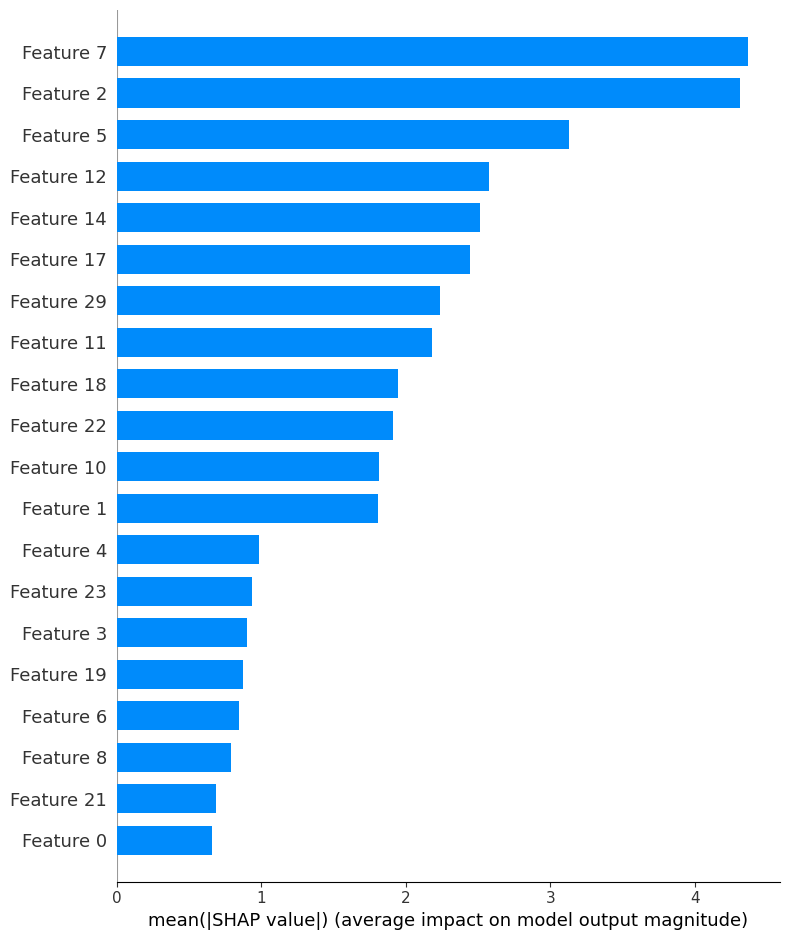

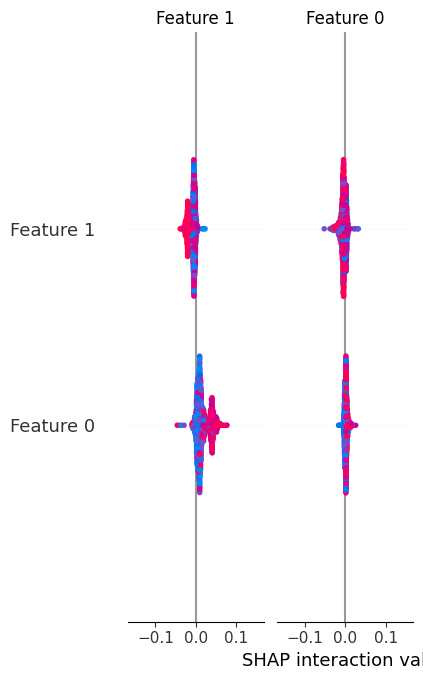

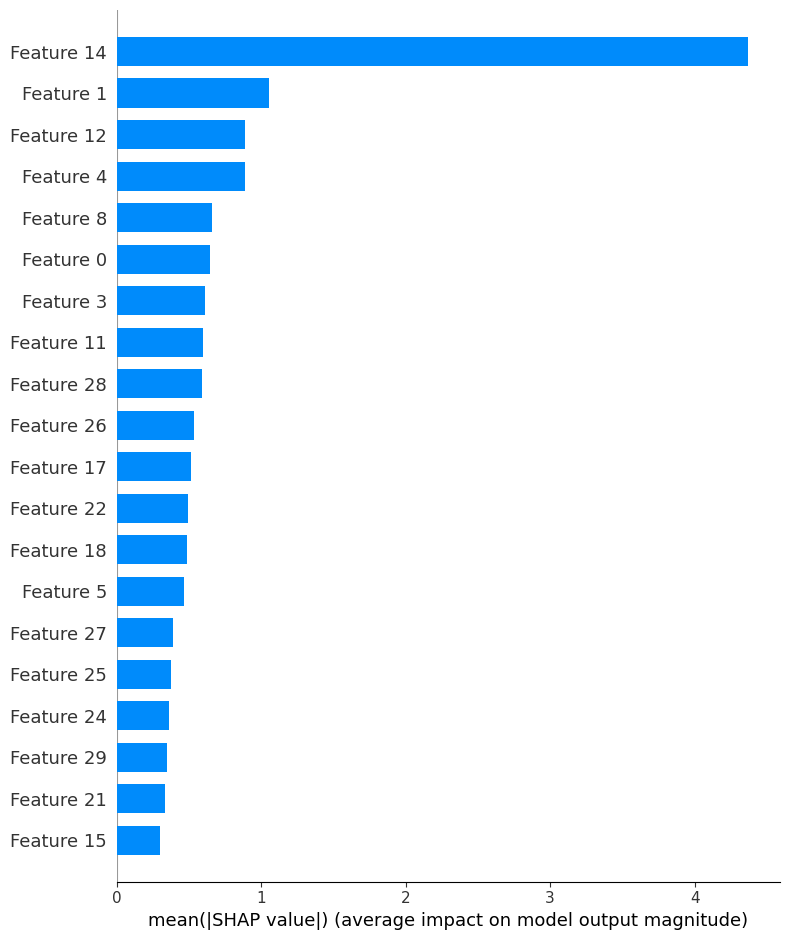

/usr/local/lib/python3.10/dist-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


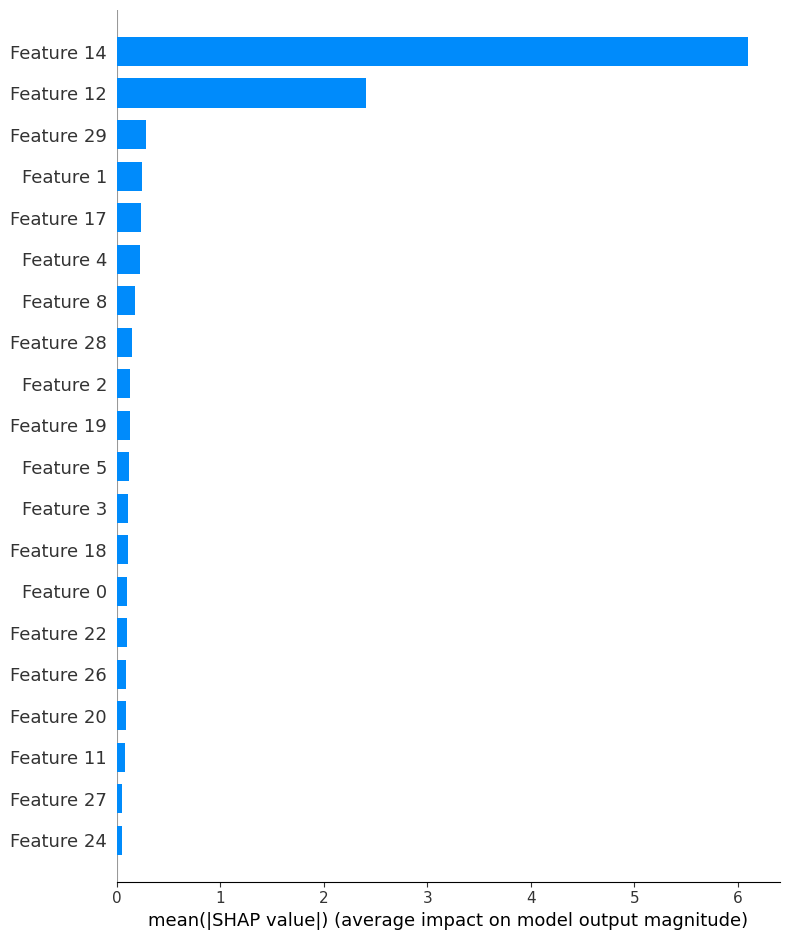

/usr/local/lib/python3.10/dist-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")


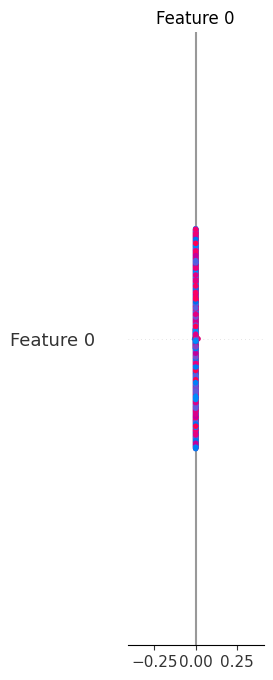

In [64]:
import shap

indices = np.random.choice(X_test.shape[0], size=1000, replace=False)

# Assuming the following models have been trained:
# logistic_regression, random_forest, xgboost_model, lightgbm_model, svm_model, neural_network_model
X_sample = X_test[indices]  # Take a small subset of the test data for SHAP explanation

# 1. SHAP for Logistic Regression
explainer_log_reg = shap.Explainer(models['Logistic Regression'], X_sample)
shap_values_log_reg = explainer_log_reg(X_sample)
shap.summary_plot(shap_values_log_reg, X_sample, plot_type="bar", show=True)

# 2. SHAP for Random Forest
explainer_rf = shap.TreeExplainer(models["Random Forest"])
shap_values_rf = explainer_rf.shap_values(X_sample)
shap.summary_plot(shap_values_rf, X_sample, plot_type="bar", show=True)

# 3. SHAP for XGBoost
explainer_xgb = shap.TreeExplainer(models["XGBoost"])
shap_values_xgb = explainer_xgb.shap_values(X_sample)
shap.summary_plot(shap_values_xgb, X_sample, plot_type="bar", show=True)

# 4. SHAP for LightGBM
explainer_lgb = shap.TreeExplainer(models["LightGBM"])
shap_values_lgb = explainer_lgb.shap_values(X_sample)
shap.summary_plot(shap_values_lgb, X_sample, plot_type="bar", show=True)

# 5. SHAP for Neural Networks
explainer_nn = shap.DeepExplainer(nn_model, X_sample)
shap_values_nn = explainer_nn.shap_values(X_sample)
shap.summary_plot(shap_values_nn, X_sample, plot_type="bar", show=True)

## Saving models for API 😚

In [65]:
import joblib
import xgboost as xgb
import lightgbm as lgb
from sklearn.svm import SVC
from tensorflow.keras.models import save_model

# Assuming you have already trained the models as follows:
# logistic_regression, random_forest, xgboost_model, lightgbm_model, svm_model, neural_network_model

# 1. Save Logistic Regression Model
joblib.dump(models["Logistic Regression"], 'logistic_regression_model.pkl')
print("Logistic Regression model saved!")

# 2. Save Random Forest Model
joblib.dump(models["Random Forest"], 'random_forest_model.pkl')
print("Random Forest model saved!")

# 3. Save XGBoost Model
models["XGBoost"].save_model('xgboost_model.json')
print("XGBoost model saved!")

# 4. Save LightGBM Model
models["LightGBM"].booster_.save_model("lightgbm_model.txt")
print("LightGBM model saved!")

# 5. Save Neural Network Model
save_model(nn_model, 'neural_network_model.keras')
print("Neural Network model saved!")

Logistic Regression model saved!
Random Forest model saved!
XGBoost model saved!
LightGBM model saved!
Neural Network model saved!


## Back to sexy graphs my lord

<ipython-input-66-660738212c77>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(results_df["Model"], rotation=45, ha="right")
<ipython-input-66-660738212c77>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(results_df["Model"], rotation=45, ha="right")
<ipython-input-66-660738212c77>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(results_df["Model"], rotation=45, ha="right")
<ipython-input-66-660738212c77>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(results_df["Model"], rotation=45, ha="right")
<ipython-input-66-660738212c77>:9: UserWarning: set_ticklabe

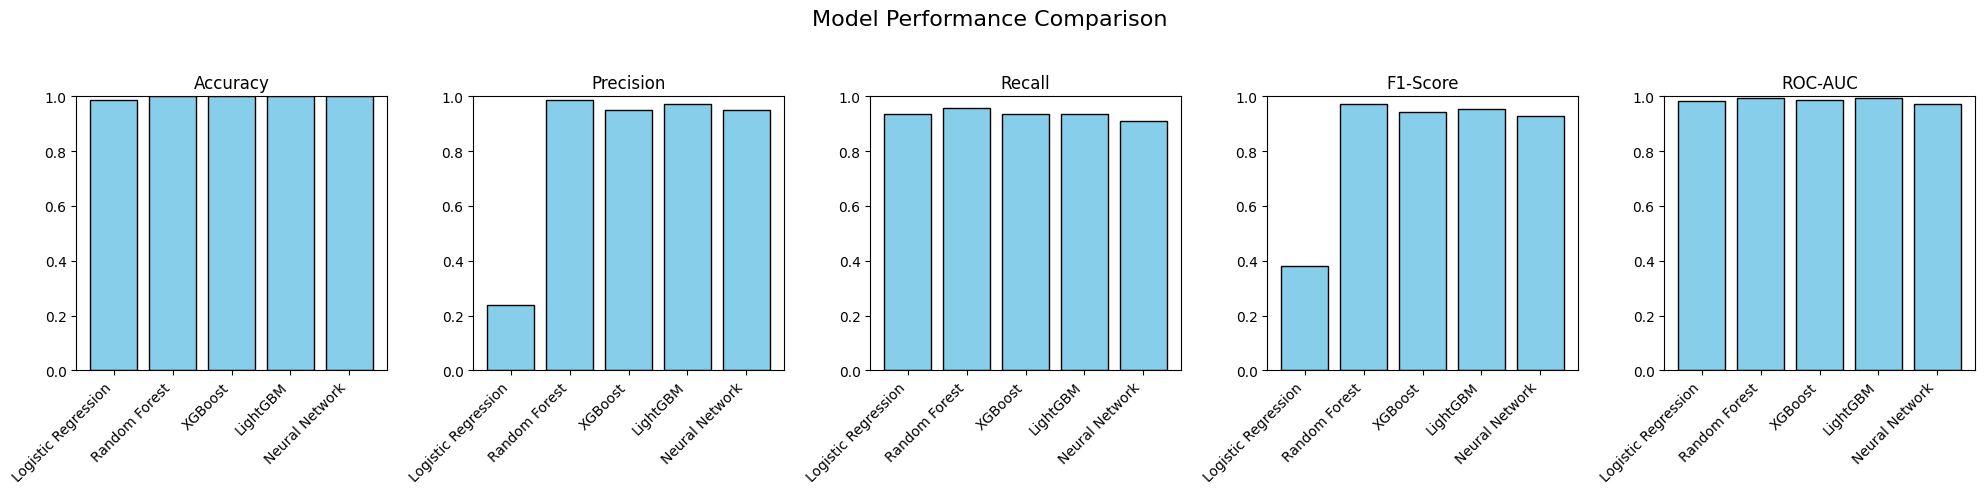

In [66]:
# Bar Plot for Comparison
metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]
fig, axes = plt.subplots(1, len(metrics), figsize=(20, 5))
fig.suptitle("Model Performance Comparison", fontsize=16)

for i, metric in enumerate(metrics):
    axes[i].bar(results_df["Model"], results_df[metric], color="skyblue", edgecolor="black")
    axes[i].set_title(f"{metric}")
    axes[i].set_xticklabels(results_df["Model"], rotation=45, ha="right")
    axes[i].set_ylim(0, 1)  # Scores range from 0 to 1

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Confusion Matrix for Best Model: Random Forest


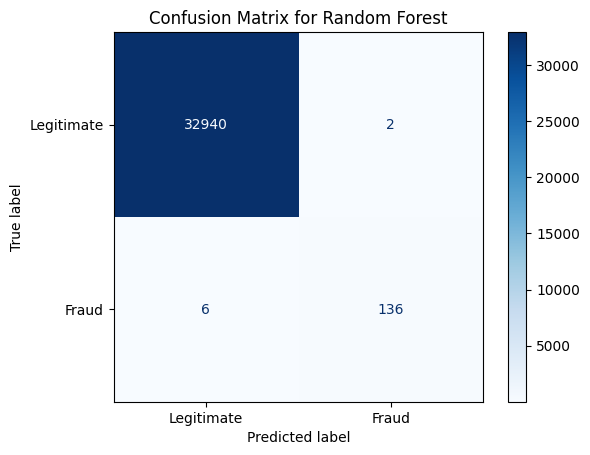

In [67]:
# Select the best model (based on F1-Score) because of hugely skewed data towards legitimate transactions
best_model_index = results_df["F1-Score"].idxmax()
best_model_name = results_df.loc[best_model_index, "Model"]
best_model = models[best_model_name] if best_model_name != "Neural Network" else nn_model

# Confusion Matrix
y_pred_best = best_model.predict(X_test) if best_model_name != "Neural Network" else y_pred_nn
cm = confusion_matrix(y_test, y_pred_best)

print(f"\nConfusion Matrix for Best Model: {best_model_name}")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Legitimate", "Fraud"])
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix for {best_model_name}")
plt.show()

In [68]:
from sklearn.metrics import classification_report

# Predict using the Random Forest model
y_pred_rf = models["Random Forest"].predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred_rf, target_names=["Legitimate", "Fraud"])

# Print the classification report
print(report)


              precision    recall  f1-score   support

  Legitimate       1.00      1.00      1.00     32942
       Fraud       0.99      0.96      0.97       142

    accuracy                           1.00     33084
   macro avg       0.99      0.98      0.99     33084
weighted avg       1.00      1.00      1.00     33084

